In [1]:
import csv
import pandas as pd
import numpy as np

airlines = pd.read_csv('airlines.csv')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [2]:
print(airlines.shape)
airlines.isna().sum() #no na's

(14, 2)


IATA_CODE    0
AIRLINE      0
dtype: int64

In [3]:
airports = pd.read_csv("airports.csv")
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [4]:
print(airports.shape)
airports.isna().sum() #3 nas in latitude and longitude

print(airports[airports['LATITUDE'].isnull()].index.tolist()) 
print(airports[airports['LONGITUDE'].isnull()].index.tolist())

airports = airports.drop([airports.index[96] , airports.index[234], airports.index[313]])

(322, 7)
[96, 234, 313]
[96, 234, 313]


In [5]:
print(airports.shape)
airports.isna().sum()

(319, 7)


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [6]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [7]:
test = pd.read_csv("flights_test.csv")
test.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912


In [8]:
print(test.shape)
test.isna().sum() #no na's

(514384, 17)


id                     0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
dtype: int64

In [9]:
train = pd.read_csv("flights_train.csv")
train.head()
print(train.shape)
train.isna().sum() #no na's

(2818553, 18)


id                     0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
dtype: int64

In [10]:
train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0


In [11]:
submitSample = pd.read_csv("submit_sample.csv")
submitSample.head()

print(submitSample.shape)
submitSample.isna().sum() #no na's


(514384, 2)


id               0
ARRIVAL_DELAY    0
dtype: int64

In [12]:
#check if ORIGIN_AIRPORT and DESTINATION_AIRPORT are in airports["IATA_CODE"] for train and test
#check if AIRLINE is in airlaines["IATA_CODE"] for train and test


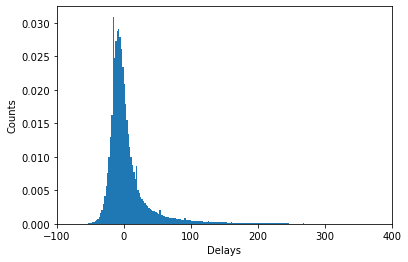

In [13]:
import matplotlib.pyplot as plt

plt.hist(train["ARRIVAL_DELAY"], density= True, bins=1000)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Delays')
plt.xlim([-100, 400])
plt.show()

In [14]:
#import matplotlib.animation as animation
##https://matplotlib.org/stable/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py

## histogram our data with numpy
#HIST_BINS = np.linspace(-100, 100, 20)
#n, _ = np.histogram(train["ARRIVAL_DELAY"], HIST_BINS)


#def prepare_animation(bar_container):

    #def animate(frame_number):
        ## simulate new data coming in
        #data = np.random.randn(1000)
        #n, _ = np.histogram(data, HIST_BINS)
        #for count, rect in zip(n, bar_container.patches):
            #rect.set_height(count)
        #return bar_container.patches
    #return animate


#fig, ax = plt.subplots()
#_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              #ec="yellow", fc="green", alpha=0.5)
#ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

#ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                            #repeat=False, blit=True)
#plt.show()

In [15]:
max(train["SCHEDULED_ARRIVAL"])
#scheduled dep, dep time, scheduled arrival are in HHMM
#arrival delay,taxi out, wheels off, and scheduled time (length of flight) are in minutes


2400

In [16]:
train["SCHEDULED_DEPT_MIN"] = ((train["SCHEDULED_DEPARTURE"]/100).apply(np.floor)*60) + train["SCHEDULED_DEPARTURE"].mod(100)

train["DEPT_TIME_MIN"] = ((train["DEPARTURE_TIME"]/100).apply(np.floor)*60) + train["DEPARTURE_TIME"].mod(100)

train["SCHEDULED_ARRIVAL_MIN"] = ((train["SCHEDULED_ARRIVAL"]/100).apply(np.floor)*60) + train["SCHEDULED_ARRIVAL"].mod(100)



In [17]:
#print(max(train["SCHEDULED_DEPT_MIN"]))
#max(train["SCHEDULED_DEPARTURE"])

train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,SCHEDULED_DEPT_MIN,DEPT_TIME_MIN,SCHEDULED_ARRIVAL_MIN
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,2354.0,21.0,15.0,205.0,1448,430,-22.0,5.0,1434.0,270.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,2.0,12.0,14.0,280.0,2330,750,-9.0,10.0,2.0,470.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,18.0,16.0,34.0,286.0,2296,806,5.0,20.0,18.0,486.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,15.0,15.0,30.0,285.0,2342,805,-9.0,20.0,15.0,485.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,24.0,11.0,35.0,235.0,1448,320,-21.0,25.0,24.0,200.0


In [18]:
from sklearn.linear_model import LinearRegression
X= train[['YEAR', 'MONTH', "DAY", "DAY_OF_WEEK",
          "TAXI_OUT", "WHEELS_OFF", 
         "SCHEDULED_TIME", "DISTANCE", "SCHEDULED_DEPT_MIN",
         "DEPT_TIME_MIN", "SCHEDULED_ARRIVAL_MIN"]]
Y= train["ARRIVAL_DELAY"]
regr = LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [19]:
print(regr.coef_)

[ 0.00000000e+00  3.08672125e-01 -9.34286209e-02 -2.59143287e-01
  1.12873875e+00 -6.36644015e-03 -2.52249267e-01  2.84890592e-02
 -1.07500409e-01  1.34146558e-01 -8.91781518e-04]


In [20]:
#grid search

y_pred = regr.predict(train[['YEAR', 'MONTH', "DAY", "DAY_OF_WEEK",
          "TAXI_OUT", "WHEELS_OFF", 
         "SCHEDULED_TIME", "DISTANCE", "SCHEDULED_DEPT_MIN",
         "DEPT_TIME_MIN", "SCHEDULED_ARRIVAL_MIN"]])

In [21]:
from sklearn import metrics

In [22]:
metrics.mean_squared_error(Y, y_pred)

1432.2957946685349

In [23]:
test["SCHEDULED_DEPT_MIN"] = ((test["SCHEDULED_DEPARTURE"]/100).apply(np.floor)*60) + test["SCHEDULED_DEPARTURE"].mod(100)

test["DEPT_TIME_MIN"] = ((test["DEPARTURE_TIME"]/100).apply(np.floor)*60) + test["DEPARTURE_TIME"].mod(100)

test["SCHEDULED_ARRIVAL_MIN"] = ((test["SCHEDULED_ARRIVAL"]/100).apply(np.floor)*60) + test["SCHEDULED_ARRIVAL"].mod(100)



In [24]:
y_predTest = regr.predict(test[['YEAR', 'MONTH', "DAY", "DAY_OF_WEEK",
          "TAXI_OUT", "WHEELS_OFF", 
         "SCHEDULED_TIME", "DISTANCE", "SCHEDULED_DEPT_MIN",
         "DEPT_TIME_MIN", "SCHEDULED_ARRIVAL_MIN"]])

In [52]:
print(y_pred)
print(y_predTest)

df = pd.DataFrame(y_predTest)
df.index=[x for x in range(0, len(df.values))]
df.index.name="id"
df.columns = [ "ARRIVAL_DELAY"]
df.head()

df.to_csv("submission1.csv")


[ 192.51740368   -4.23995315   -1.27737823 ... -155.92509768 -162.56148219
 -163.4416126 ]
[  -2.94782225  194.63914616  212.49242841 ...   30.14166531 -158.49590585
   38.03639525]


In [41]:
#one hot encoding to add airport to regression model - data processing

train['ORIGIN_AIRPORT_NEW'] = train['ORIGIN_AIRPORT'].astype(str) + ' - origin'

train['DESTINATION_AIRPORT_NEW'] = train['DESTINATION_AIRPORT'].astype(str) + ' - destination'

test['ORIGIN_AIRPORT_NEW'] = test['ORIGIN_AIRPORT'].astype(str) + ' - origin'

test['DESTINATION_AIRPORT_NEW'] = test['DESTINATION_AIRPORT'].astype(str) + ' - destination'

print(train.head())

   id  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0   0  2015      1    1            4      AS             98      N407AS   
1   1  2015      1    1            4      AA           2336      N3KUAA   
2   2  2015      1    1            4      US            840      N171US   
3   3  2015      1    1            4      AA            258      N3HYAA   
4   4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  TYS - destination  \
0            ANC                 SEA  ...                  0   
1            LAX                 PBI  ...                  0   
2            SFO                 CLT  ...                  0   
3            LAX                 MIA  ...                  0   
4            SEA                 ANC  ...                  0   

   UST - destination  VEL - destination  VLD - destination  VPS - destination  \
0                  0                  0                  0                  0   
1 

In [27]:
tr1 = pd.get_dummies(train.ORIGIN_AIRPORT_NEW)
tr2 = pd.get_dummies(train.DESTINATION_AIRPORT_NEW)

In [28]:
tr1.head()
tr2.head()

,ABE - destination,ABI - destination,ABQ - destination,ABR - destination,ABY - destination,ACK - destination,ACT - destination,ACV - destination,ACY - destination,ADK - destination,...,TYS - destination,UST - destination,VEL - destination,VLD - destination,VPS - destination,WRG - destination,WYS - destination,XNA - destination,YAK - destination,YUM - destination
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train = pd.merge(train, tr1, left_index=True, right_index=True)
train = pd.merge(train, tr2, left_index=True, right_index=True)

In [30]:
train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TYS - destination,UST - destination,VEL - destination,VLD - destination,VPS - destination,WRG - destination,WYS - destination,XNA - destination,YAK - destination,YUM - destination
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,0,0,0,0,0,0,0,0,0,0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,0,0,0,0,0,0,0,0,0,0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,0,0,0,0,0,0,0,0,0,0


In [31]:
te1 = pd.get_dummies(test.ORIGIN_AIRPORT_NEW)
te2 = pd.get_dummies(test.DESTINATION_AIRPORT_NEW)
test = pd.merge(test, te1, left_index=True, right_index=True)
test = pd.merge(test, te2, left_index=True, right_index=True)
test.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TYR - destination,TYS - destination,UST - destination,VLD - destination,VPS - destination,WRG - destination,WYS - destination,XNA - destination,YAK - destination,YUM - destination
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,...,0,0,0,0,0,0,0,0,0,0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,...,0,0,0,0,0,0,0,0,0,0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,...,0,0,0,0,0,0,0,0,0,0


In [32]:

# 1. Select model and import it
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 2. Select model hyperparameters (here, we will use a polynomial, degree 2, basis function)
polymodel = make_pipeline(PolynomialFeatures(), LinearRegression())

# 3. Arrange data in feature matrix (or vector if just 1 feature) and Target array

X= train[['YEAR', 'MONTH', "DAY", "DAY_OF_WEEK",
          "TAXI_OUT", "WHEELS_OFF", 
         "SCHEDULED_TIME", "DISTANCE", "SCHEDULED_DEPT_MIN",
         "DEPT_TIME_MIN", "SCHEDULED_ARRIVAL_MIN"]].values

Y= train["ARRIVAL_DELAY"].values

polymodel.fit(X, Y)



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

[ 2.70376080e-15 -4.24159270e-14  1.33816178e-07  4.83700415e-09
 -7.19110732e-08  2.04323343e-07  1.43339578e-08 -6.29281131e-08
  8.03794903e-09 -1.32959359e-07  1.24468982e-07 -1.16339250e-08
 -1.02809200e-14  2.69639551e-04  9.74657013e-06 -1.44900785e-04
  4.11711499e-04  2.88828842e-05 -1.26800185e-04  1.61964483e-05
 -2.67913135e-04  2.50804977e-04 -2.34423517e-05  4.79885026e-02
  3.85084453e-02 -5.00899330e-02 -6.27166857e-03  1.62889067e-04
 -2.78301361e-02  3.34225711e-03  6.35645268e-04 -1.73529127e-03
  5.84550693e-04 -1.75816391e-04  7.81393031e-03 -1.38880375e-03
  1.10443063e-04 -4.14242487e-03  4.72170722e-04 -2.62949939e-04
  5.93632099e-05  1.23186270e-05  2.89971796e-02 -2.81665391e-04
  2.55505406e-04 -2.28202998e-03  3.37017962e-04  1.02326119e-04
 -3.69659304e-04 -4.48348033e-05  2.38354821e-03 -1.15121272e-04
  9.48431559e-04 -9.75543223e-05  9.94931697e-04 -8.55188833e-04
  5.97113027e-05  3.08120794e-05 -1.17898921e-03  1.44362712e-04
 -6.59880402e-04  5.90043

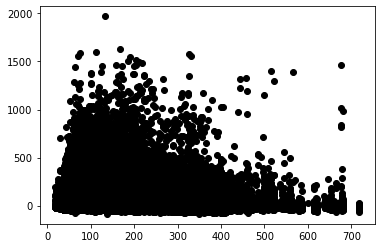

In [33]:
print(polymodel['linearregression'].coef_)

dow = train[['SCHEDULED_TIME']].values
print(dow)
xfit = np.linspace(float(min(dow)), float(max(dow)), 100)
yfit = polymodel.predict(X)

print(yfit)

# Plot
plt.scatter(dow, Y, c='black')
#plt.plot(xfit, yfit, c='red');

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

model = make_pipeline(PolynomialFeatures(), LinearRegression())
# in the original notebook we had PolynomialFeatures(4) -> the parameter 4 is ignored in the grid search

grid = GridSearchCV(model, param_grid, cv=7)

grid.fit(Xtrain[:, np.newaxis], Ytrain);

grid.best_params_

NameError: name 'Xtrain' is not defined